# Exploring neuroanatomical measures of the PNC data
This notebook accompanies below paper:  

[10.1016/j.neuroimage.2018.01.065](https://doi.org/10.1016/j.neuroimage.2018.01.065)

In this notebook, we apply linear regression on FreeSurfer outputs of the PNC study using a robust linear regression technique. 

* Strucutral MRI of the [PNC study](http://www.med.upenn.edu/bbl/philadelphianeurodevelopmentalcohort.html ) were used for this study.  
* Morphological features of the strucutral images were derived using [FreeSurfer](http://freesurfer.net) toolkit.  
* FreeSurfer analysis was performed using [LONI pipeline](http://pipeline.loni.usc.edu) on high performance computing of <font color='red'>**USC**</font> Mark and Mary Stevens Neuroimaging and Informatics [Institute](http://www.ini.usc.edu), Keck school of Medicine of <font color='red'>**USC**</font>. The outputs were QC'ed and used as the input of this notebook. 

author:  
Farshid Sepehrband,   
*Laboratory of Neuro Imaging, USC Mark and Mary Stevens Neuroimaging and Informatics Institute, Keck School of Medicine of USC, University of Southern California, Los Angeles, CA, USA*  
<farshid.sepehrband@loni.usc.edu>  
@fsepehrband


# Table of content
* [Importing required libraris](#lib)
* [Reading FreeSurfer's outputs](#input)  
    o [First example: Compare brain sizes](#plot-example)  
    o [Second example: Visualize a finding from literature](#plot-example2)  
* [Separating brain size, age, gender and race data](#separate)  
    o [Draw joint relationship between brain size, age, gender and race data](#confound-view)

## Importing required libraries <a class="anchor" id="lib"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import pandas as pd 
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Read FreeSurfer's outputs <a class="anchor" id="input"></a>

In [2]:
myDir = '/Users/farshid/Dropbox/Research/Codes/GitHub/NeuroAnat_SexDiff'
os.chdir(myDir)
dataset = pd.read_csv('../NeuroAnat_SexDiff_data/pnc_withNames.csv')

## dataset has extra quotation mark in the names, so:
dataset.columns = dataset.columns.str.replace('\'',"")

# remove rows with NaN values
tempo = dataset.isnull().sum(axis=1)
indx_nan = list(np.where(tempo >= 1))
dataset.drop(dataset.index[indx_nan],inplace=True)

# check input dataframe
dataset.head()

,FreeSurfer:FS_aparc_2009:ctx_lh_G_and_S_frontomargin:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_and_S_occipital_inf:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_and_S_paracentral:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_and_S_subcentral:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_and_S_transv_frontopol:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_and_S_cingul-Ant:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_and_S_cingul-Mid-Ant:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_and_S_cingul-Mid-Post:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_cingul-Post-dorsal:L:area:,FreeSurfer:FS_aparc_2009:ctx_lh_G_cingul-Post-ventral:L:area:,...,FreeSurfer:FS_wmparc:Left-UnsegmentedWhiteMatter:L:volume:,FreeSurfer:FS_wmparc:Right-UnsegmentedWhiteMatter:R:volume:,FreeSurfer:FS_wmparc:lhCorticalWhiteMatterVol:N:volume:,FreeSurfer:FS_wmparc:rhCorticalWhiteMatterVol:N:volume:,FreeSurfer:FS_wmparc:CorticalWhiteMatterVol:N:volume:,FreeSurfer:FS_wmparc:MaskVol:N:volume:,FreeSurfer:FS_wmparc:EstimatedTotalIntraCranialVol:N:volume:,Age,Race,Gender
1,826.0,1080.0,859.0,895.0,553.0,1458.0,723.0,715.0,296.0,158.0,...,24579.1,26153.7,206855.0,208131.0,414986.0,1512450.0,1412750.0,187.0,1,1
2,679.0,900.0,900.0,1022.0,563.0,1682.0,981.0,863.0,321.0,163.0,...,21214.1,21127.0,199791.0,201670.0,401461.0,1498870.0,1420220.0,190.0,1,1
3,687.0,1524.0,858.0,1230.0,420.0,1841.0,1022.0,952.0,495.0,257.0,...,27110.0,27824.2,223792.0,227071.0,450863.0,1752370.0,1557320.0,242.0,0,0
4,765.0,876.0,971.0,978.0,344.0,1352.0,708.0,727.0,300.0,184.0,...,25375.2,25817.9,196285.0,199616.0,395901.0,1541160.0,1499480.0,137.0,0,1
5,712.0,780.0,903.0,1015.0,625.0,1543.0,840.0,805.0,354.0,159.0,...,18468.7,19526.6,187218.0,190497.0,377715.0,1505570.0,1419150.0,139.0,0,0


### Look at brain size differences, based on age <a class="anchor" id="plot-example"></a>
Here we plot estimated total intracranial volume (eTIV) as a function of age across gender (Any given neuroanatomical feature can be plotted). 

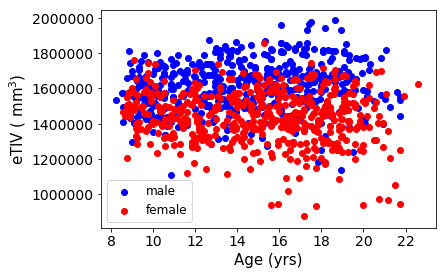

In [3]:
# define neuroanatomical region of interest
neuro = 'EstimatedTotalIntraCranialVol'

# another example can be: 
# neuro = 'FS_aparc_2009:ctx_lh_G_occipital_middle:L:thickness:'

temp = [col for col in list(dataset) if neuro in col]

for i in 0,1:
    x = dataset.loc[dataset['Gender']==i,'Age']/12
    y = dataset.loc[dataset['Gender']==i,temp]
    plt.scatter(x,y,color='red' if i==1 else 'blue',label='female' if i==1 else 'male')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower left',fontsize=12)
plt.xlabel('Age (yrs)',size=15)
plt.ylabel(r'eTIV ( mm$^3$)',size=15)
plt.show()

### Plotting mean value of a region, with and without incorporating brain size <a class="anchor" id="plot-example2"></a>
This cell enables reproduction of literature findings about neuroanatomical sex differences, in an abstract level. For example,  
[Ritchie et al](http://biorxiv.org/content/early/2017/04/14/123729.full.pdf+html) reported that the cortical surface are of the right precentral gyrus is significantly different between male and females, even with brain size adjustments.    
>"... for some regions, especially for surface area (particularly in areas such as the left isthmus of the cingulate gyrus and the **right precentral gyrus**), males still showed a significantly higher measurement, indicating specific sex differences in the proportional configuration of the cortex, holding brain size equal."

Therefore, we selected **right precentral gyrus** as the imaging derived phenotypes (IDP) of interest, and looked at the sex difference:

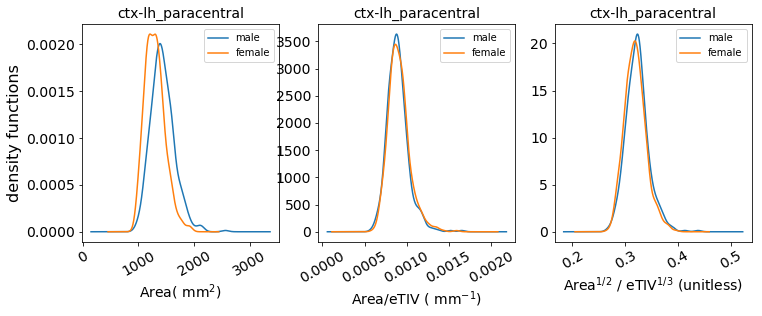

,direct,eTIV adj,unitless eTIV adj
male,1435.479744,0.000894,0.322743
female,1296.556225,0.000908,0.318948


In [4]:
# define atlas, region and morphological characteristic 
atlas_temp = 'FS_aparc_aseg'
region_temp = 'lh_paracentral'
pheno_temp = 'area'
temp = [col for col in list(dataset) if (region_temp in col) & (pheno_temp in col) & (atlas_temp in col)]

# extract eTIV, for adjustment 
neuro2 = 'EstimatedTotalIntraCranialVol'
temp2 = [col for col in list(dataset) if neuro2 in col]

# output dataframe
compMean = pd.DataFrame(np.empty((2,2)),index=['male','female'],columns=['direct','eTIV adj'])

# plot histograms
fig = plt.figure(figsize=(12,4))
for i in 0,1:
    # subplot 1
    x = dataset.loc[dataset['Gender']==i,'Age']
    y = dataset.loc[dataset['Gender']==i,temp]
    ax1 = fig.add_subplot(131)
    y.plot(kind='density',ax=ax1,legend=False,label='female' if i==1 else 'male')
    if i==0:
        compMean.loc['male','direct'] = float(np.mean(y))
    else:
        compMean.loc['female','direct'] = float(np.mean(y))
    plt.legend(('male','female'),loc='upper right')
    plt.xticks(fontsize=14,rotation=30)
    plt.xlabel(pheno_temp.title()+r'( mm$^2$)',size=14)
    plt.ylabel('density functions',size=16)
    plt.yticks(fontsize=14)
    plt.title(str(temp).split(':')[2],size=14)

    # subplot 2
    eTIV = dataset.loc[dataset['Gender']==i,temp2]  
    y = np.divide(y,eTIV)
    ax2 = fig.add_subplot(132)
    y.plot(kind='density',ax=ax2,legend=False,label='female' if i==1 else 'male')
    plt.legend(('male','female'),loc='upper right')
    plt.xlabel(pheno_temp.title()+r'/eTIV ( mm$^{-1}$)',size=14)
    plt.xticks(fontsize=14,rotation=30)
    plt.yticks(fontsize=14)
    plt.ylabel('')
    plt.title(str(temp).split(':')[2],size=14)
    if i==0:
        compMean.loc['male','eTIV adj'] = float(np.mean(y))
    else:
        compMean.loc['female','eTIV adj'] = float(np.mean(y))
    
    # subplot 3
    y = np.divide(dataset.loc[dataset['Gender']==i,temp]**(1/2),eTIV**(1/3))
    ax2 = fig.add_subplot(133)
    y.plot(kind='density',ax=ax2,legend=False,label='female' if i==1 else 'male')
    plt.legend(('male','female'),loc='upper right')
    plt.xlabel(pheno_temp.title()+r'$^{1/2}$ / eTIV$^{1/3}$ (unitless)',size=14)
    plt.xticks(fontsize=14,rotation=30)
    plt.yticks(fontsize=14)
    plt.ylabel('')
    plt.title(str(temp).split(':')[2],size=14)
    if i==0:
        compMean.loc['male','unitless eTIV adj'] = float(np.mean(y))
    else:
        compMean.loc['female','unitless eTIV adj'] = float(np.mean(y))

plt.show()
compMean

## Separating information about brain size, age, gender and self-identified race <a class="anchor" id="separate"></a>
Now we start prepare the data for the regression analysis. But, before that, we take a look at the relation of demographic covariates with themselves and with brain size.  
For the ease of use, neuroimaging data are separated from demographic information. The estimated total intracranial volume (eTIV) was also separated to be added as a covariate to the regression analysis. 

In [5]:
eTIV_name = [col for col in list(dataset) if 'EstimatedTotalIntraCranialVol:N:volume' in col][0]
temp = [col for col in list(dataset) if col.startswith('FreeSurfer')]
temp.remove(eTIV_name)
nimg = dataset[temp]

temp = [col for col in list(dataset) if 'FreeSurfer' not in col]
temp.remove('Gender')
conf = dataset[temp]
conf = pd.concat([conf, dataset[eTIV_name]],axis=1)
conf.rename(columns = {eTIV_name:'eTIV'}, inplace = True)

pheno = dataset['Gender']
pd.concat([conf,pheno],axis=1).describe()

,Age,Race,eTIV,Gender
count,967.000000,967.000000,9.670000e+02,967.000000
mean,176.674249,0.458118,1.520103e+06,0.514995
std,40.995789,0.498501,1.703410e+05,0.500034
min,99.000000,0.000000,8.802730e+05,0.000000
25%,142.500000,0.000000,1.407205e+06,0.000000
50%,179.000000,0.000000,1.522930e+06,1.000000
75%,210.000000,1.000000,1.640820e+06,1.000000
max,271.000000,1.000000,1.986020e+06,1.000000


### Interaction between: age, gender, race and the brain size <a class="anchor" id="confound-view"></a>
Here we draw a pairplot of demographic information and eTIV.

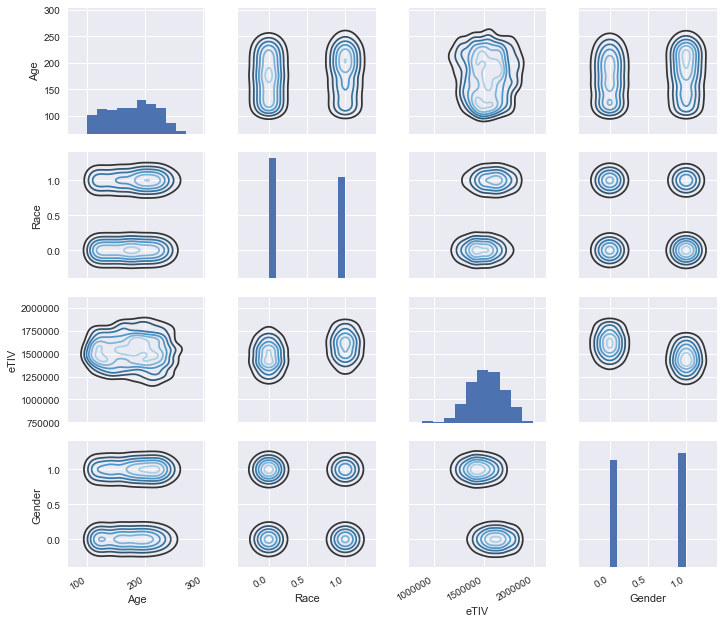

In [6]:
import seaborn as sns
fig1 = plt.figure()
test = pd.concat([conf,pheno],axis=1)
ax = sns.PairGrid(test)#, vars=['Age', 'Gender', 'ICV'])
ax.map_diag(plt.hist)
ax.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);
ax.fig.autofmt_xdate()
plt.show()